In [1]:
%run ../src/models/train_interaction_model.py

csv in variable: data
dataframes: strat_train_set, strat_test_set 
loaded pipeline: interaction_pipeline
loaded pipeline: log_pipeline
loaded pipeline: cluster_simil_
loaded pipeline: default_pipeline
loaded interaction pipeline: preprocessing_int
Training: log_search_int --- 560.8766922950745 seconds ---


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [3]:
%run ../src/data/stratified_data.py

dataframes: strat_train_set, strat_test_set 


In [4]:
x_test = strat_test_set.iloc[:,:-2]

y_test = strat_test_set.iloc[:,-2]

In [5]:
best_interaction_model = log_search_int.best_estimator_

Text(0.5, 1.0, 'Recall Scores - Cross Validation')

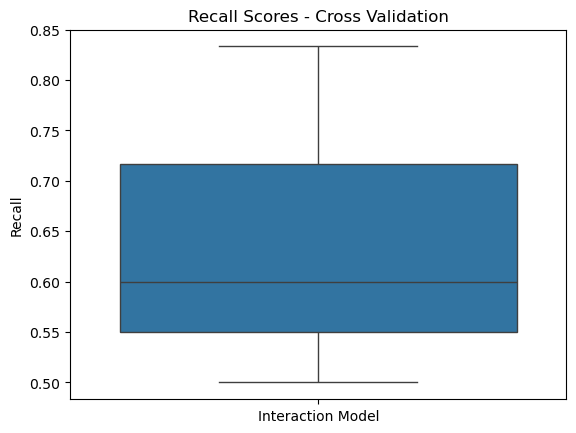

In [8]:
test_scores_cv = cross_val_score(best_interaction_model
                                    , x_test, y_test
                                    , scoring="recall"
                                    , cv=3
                                    )

test_scores = pd.DataFrame({ 'Interaction Model': test_scores_cv })

box = sns.boxplot(test_scores)
box.set_ylabel("Recall")
box.set_title("Recall Scores - Cross Validation")


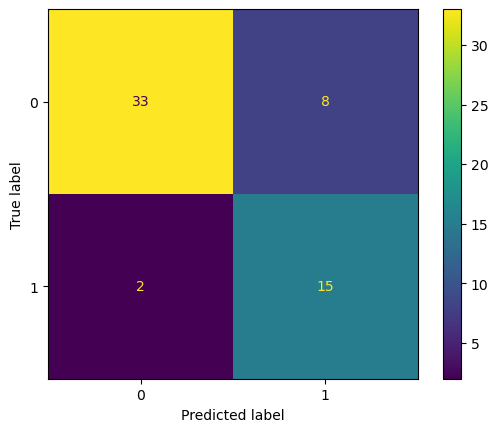

In [11]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_matrix = confusion_matrix(y_test, best_interaction_model.predict(x_test))
test_plot= ConfusionMatrixDisplay(confusion_matrix=test_matrix)
test_plot.plot()

 This demonstrates that adding a term can enhance model performance without the need for more complex models